# Plots

#Data

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import warnings
import seaborn as sns
from IPython.core.display import display, HTML
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
import pickle

with open('/content/gdrive/My Drive/results/bakery_result_all', 'rb') as f:
    bakery = pickle.load(f)
with open('/content/gdrive/My Drive/results/yaz_results_all', 'rb') as f:
    yaz = pickle.load(f)
with open('/content/gdrive/My Drive//results/M5_result_all_final', 'rb') as f:
    M5 = pickle.load(f)

Mounted at /content/gdrive


In [ ]:
yaz = yaz.copy()
Yaz = yaz[yaz['Model'] != 'SAA']

bakery = bakery.copy()
Bakery = bakery[bakery['Model'] != 'SAA']

M5 = M5.copy()
M5 = M5[M5['Model'] != 'SAA']



Yaz   ['delta C']    = Yaz['delta C'].astype(float)
Bakery['delta C']    = Bakery['delta C'].astype(float)
M5    ['delta C']    = M5['delta C'].astype(float)


datasets = [Yaz, Bakery, M5]
dataset_names = ['Yaz', 'Bakery', 'M5']  # Annahme: Liste der Dataset-Namen

for dataset in datasets:
    dataset['Model'] = dataset['Model'].replace('drf', 'DRF')

#Base Scenario + SL & Feature Variation

Datensatz: Yaz


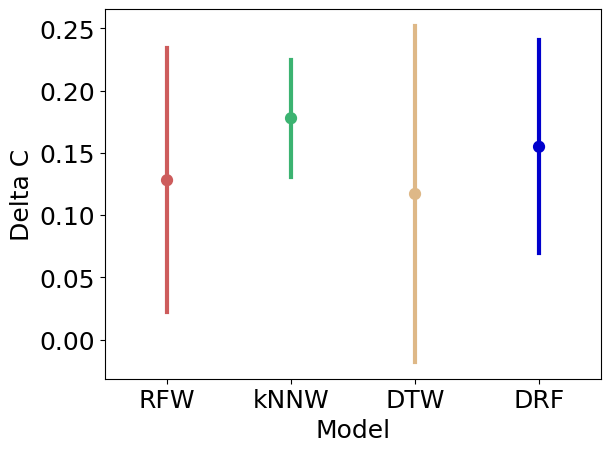

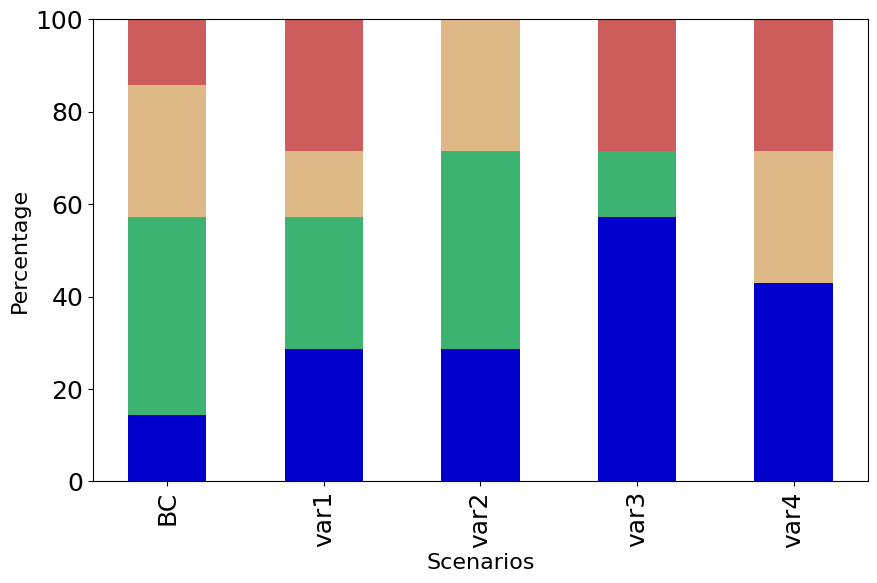

Datensatz: Bakery


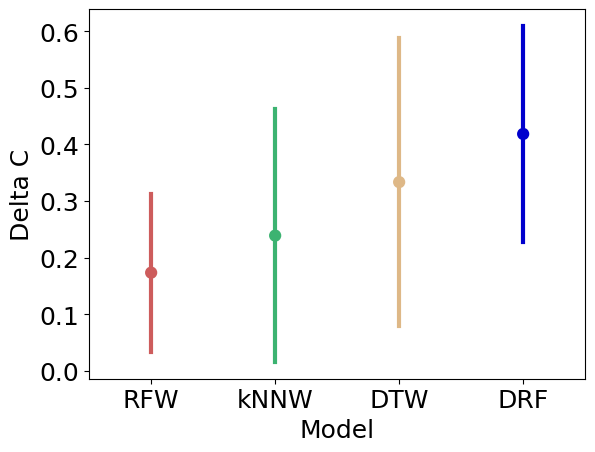

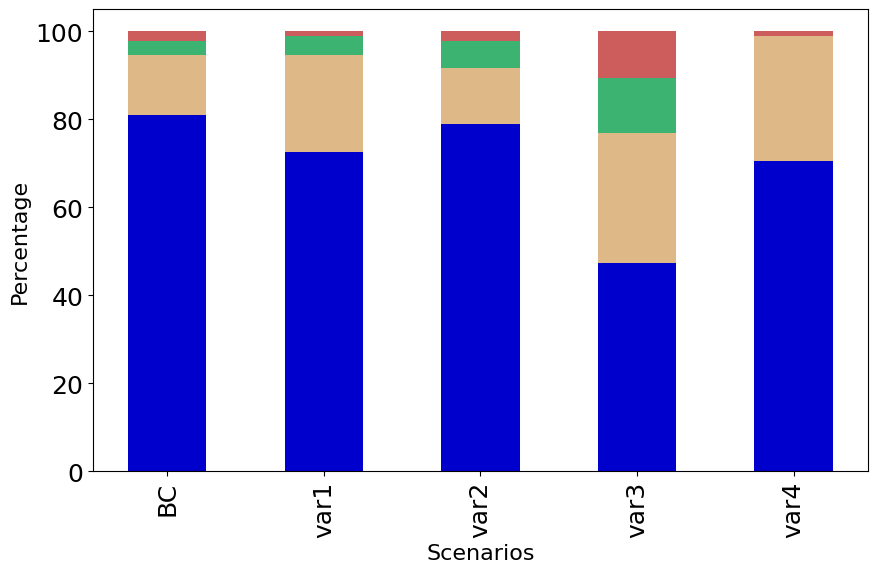

Datensatz: M5


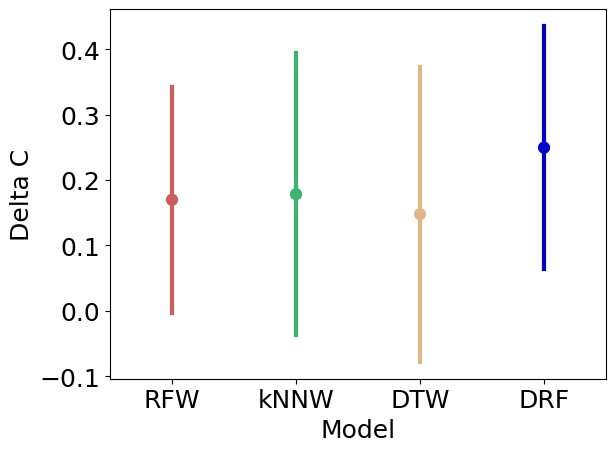

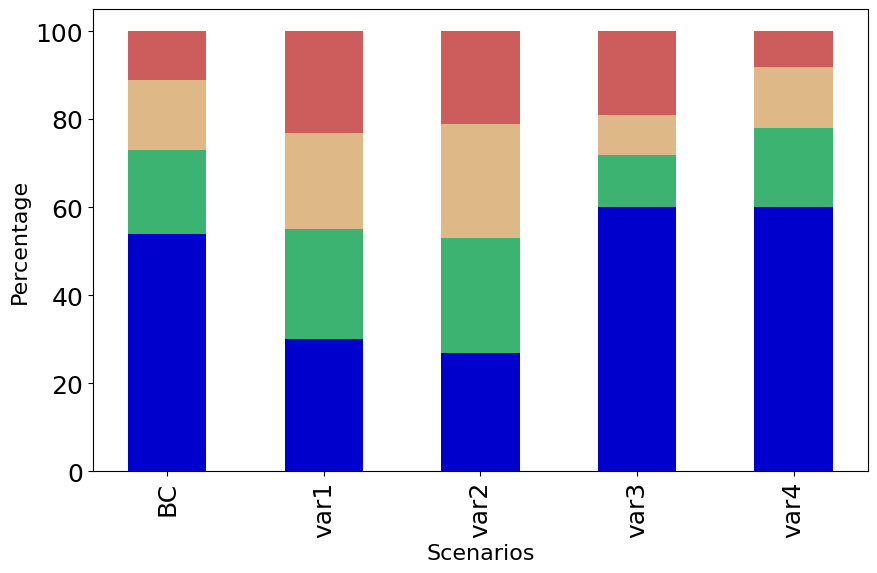

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

datasets = [Yaz, Bakery, M5]
dataset_names = ['Yaz', 'Bakery', 'M5']  # Annahme: Liste der Dataset-Namen

model_color_mapping = {
    'DTW': "burlywood",
    'RFW':  "indianred",
    'DRF': "mediumblue",
    'kNNW':"mediumseagreen",
}



def plot_delta_c(data, palette):
    # Filtern Sie die Daten nach den gewünschten Bedingungen
    filtered_data = data[(data['sl'] == 0.9) & (data['features'] == 'calendric,lag')]

    # Erstellen Sie das Punktdiagramm mit Kreis-Markern für Delta C
    ax = sns.pointplot(x="Model", y="delta C", data=filtered_data, ci='sd', palette=palette, markers="o", )
    plt.figure(figsize=(10, 6))
    ax.set_xlabel('Model', fontsize=18)
    ax.set_ylabel('Delta C', fontsize=18)
    plt.title(f' {dataset_name}')
    plt.yticks(fontsize=18)
    ax.tick_params(axis='y', labelsize=18)
    ax.tick_params(axis='x', labelsize=18)
    # Passen Sie die Strichdicke an
    for line in ax.lines:
        line.set_linewidth(3)  # Hier können Sie die gewünschte Strichdicke einstellen



def plot_stacked_bar_chart(dataset, colors):
    def find_best_models_and_percentages(data):
        scenarios = {
            "BC": {'sl_value': 0.9, 'features_value': "calendric,lag"},
            "var1": {'sl_value': 0.75, 'features_value': 'calendric,lag'},
            "var2": {'sl_value': 0.5, 'features_value': "calendric,lag"},
            "var3": {'sl_value': 0.9, 'features_value': "Calendric"},
            "var4": {'sl_value': 0.9, 'features_value': "calendric_lag_special"}
        }

        # Erstellen Sie eine leere DataFrame, um die Ergebnisse zu speichern
        result_df = pd.DataFrame(columns=['Scenario', 'Variable', 'Model', 'Count'])

        for scenario_name, scenario_params in scenarios.items():
            sl_value = scenario_params['sl_value']
            features_value = scenario_params['features_value']

            # Filtern Sie die Daten basierend auf den aktuellen Szenario-Parametern
            filtered_data = data[(data['sl'] == sl_value) & (data['features'] == features_value)]

            # Gruppieren Sie den DataFrame nach "Variable"
            grouped = filtered_data.groupby('Variable')

            # Iterieren Sie durch jede Gruppe im aktuellen Szenario
            for name, group in grouped:
                # Finden Sie das Modell mit dem höchsten "delta C" in dieser Gruppe
                best_model = group.loc[group['delta C'].idxmax()]['Model']

                # Zählen Sie die Anzahl der Vorkommen dieses Modells in der Gruppe
                model_count = group[group['Model'] == best_model].shape[0]

                # Fügen Sie die Ergebnisse zur resultierenden DataFrame hinzu
                result_df = result_df.append({'Scenario': scenario_name,
                                              'Variable': name, 'Model': best_model, 'Count': model_count}, ignore_index=True)

        # Gruppieren Sie den DataFrame nach "Scenario" und "Model" und zählen Sie die Vorkommen
        model_counts = result_df.groupby(['Scenario', 'Model'])['Count'].sum().reset_index()

        # Berechnen Sie die prozentualen Anteile je Szenario
        model_counts['Model_Percentage'] = model_counts.groupby('Scenario')['Count'].apply(lambda x: (x / x.sum()) * 100)

        return model_counts

    # Call the function to get the results
    result = find_best_models_and_percentages(data)

    df_pivot = result.pivot(index='Scenario', columns='Model', values='Model_Percentage')

    # Fill NaN values with zeros
    df_pivot.fillna(0, inplace=True)
    # Create the stacked bar chart
    df_pivot = df_pivot[df_pivot.sum().sort_values(ascending=False).index]

    models = df_pivot.columns

    # Position for the bars
    x = df_pivot.index
    width = 0.5

    # Initialize 'bottom' with zeros for each scenario
    bottom = pd.Series([0] * len(x), index=x)
    width = 0.5
    for model in models:
        # Get the model percentages for the current model
        model_percentages = df_pivot[model]

        # Create the bar for the current model, starting at the cumulative 'bottom' values
        plt.bar(x, model_percentages, label=model, width=width, bottom=bottom, color=model_color_mapping.get(model, 'blue'))

        # Update the 'bottom' values with the current model's percentages
        bottom += model_percentages
    # Axis labels
    plt.xlabel('Scenarios', fontsize=16)
    plt.ylabel('Percentage',  fontsize=16)
    plt.xticks(rotation=90)
    plt.yticks(fontsize=18)
    plt.xticks(fontsize=18)
    plt.title('')
    # Show the chart
    plt.show()

for data, dataset_name in zip(datasets, dataset_names):
    print("Datensatz:", dataset_name)
    plot_delta_c(data, model_color_mapping)
    plot_stacked_bar_chart(data, model_color_mapping)


In [ ]:
print(M5)

              Variable   cu   co Model  Average Costs  \
1     CA_1_FOODS_3_080  2.5  7.5   RFW      18.303571   
2     CA_1_FOODS_3_080  2.5  7.5  kNNW      20.714286   
3     CA_1_FOODS_3_080  2.5  7.5   DTW      20.000000   
4     CA_1_FOODS_3_080  2.5  7.5   DRF      17.589286   
6     CA_1_FOODS_3_226  2.5  7.5   RFW       7.946429   
...                ...  ...  ...   ...            ...   
3494  WI_3_FOODS_3_694  5.0  5.0   DRF      39.043321   
3496  WI_3_FOODS_3_714  5.0  5.0   RFW      41.428571   
3497  WI_3_FOODS_3_714  5.0  5.0  kNNW      41.964286   
3498  WI_3_FOODS_3_714  5.0  5.0   DTW      36.428571   
3499  WI_3_FOODS_3_714  5.0  5.0   DRF      40.000000   

                                            Best Params   delta C  \
1     {'max_depth': None, 'min_samples_split': 16, '...  0.123932   
2                                   {'n_neighbors': 16}  0.008547   
3             {'max_depth': 4, 'min_samples_split': 64}  0.042735   
4               {'min_node_size': 15, '

In [ ]:
eindeutige_werte = M5['sl'].unique()

# Die eindeutigen Werte ausgeben
for wert in eindeutige_werte:
    print(wert)

0.25
0.1
0.9
0.75
0.5


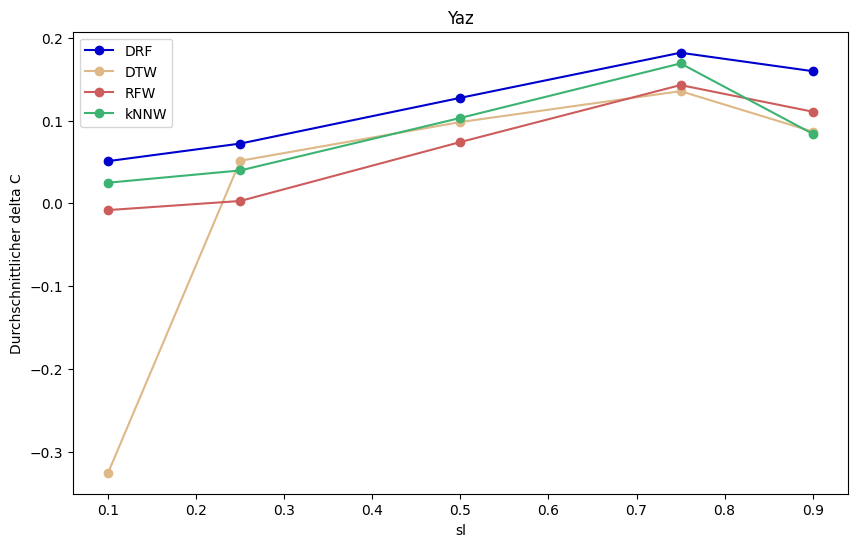

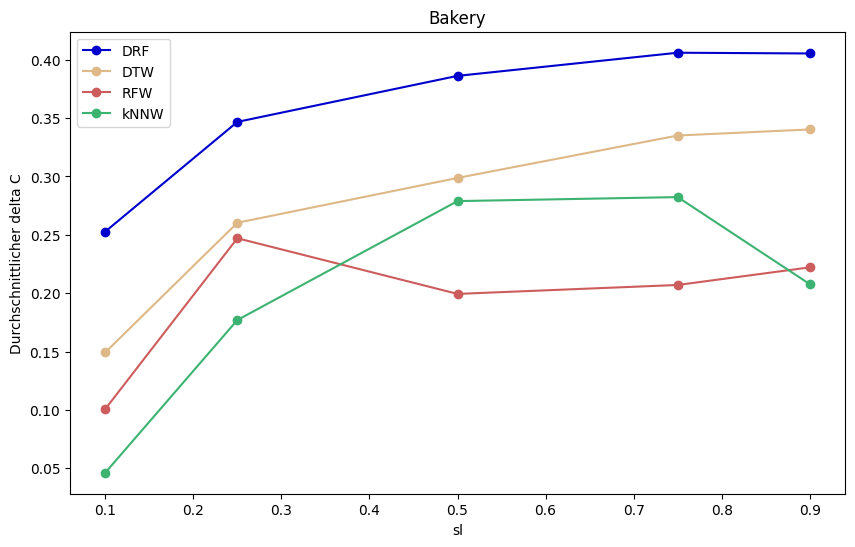

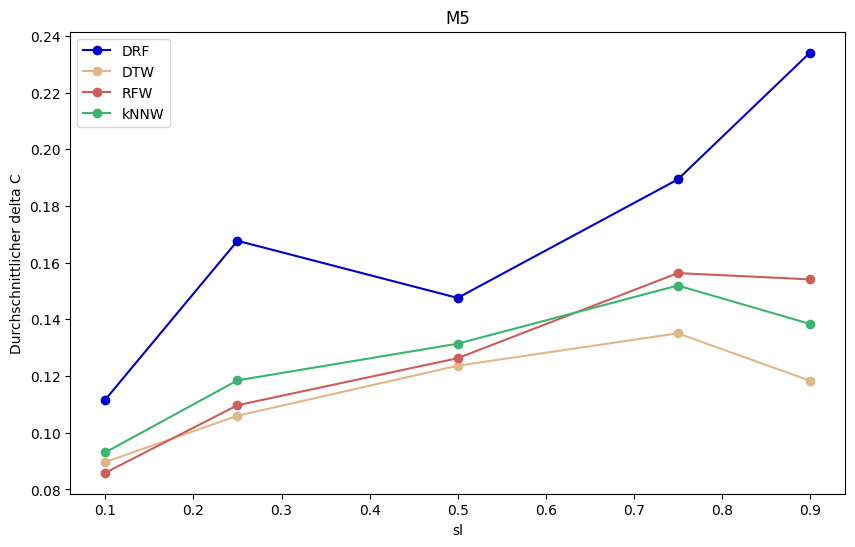

In [ ]:
import matplotlib.pyplot as plt

for dataset, dataset_name in zip(datasets, dataset_names):
    # Gruppiere das DataFrame nach "Model" und "sl" und berechne den Durchschnitt für "delta C"
    aggregated_data = dataset.groupby(['Model', 'sl'])['delta C'].mean().reset_index()

    # Erstelle ein Liniendiagramm mit separaten Linien für jedes Modell und verschiedenen Farben
    plt.figure(figsize=(10, 6))  # Optional: Legt die Größe des Diagramms fest

    for model, group_data in aggregated_data.groupby('Model'):
        color = model_color_mapping.get(model, 'b')  # 'b' ist die Standardfarbe
        plt.plot(group_data['sl'], group_data['delta C'], marker='o', linestyle='-', label=model, color=color)

    # Achsenbeschriftungen und Legende hinzufügen
    plt.xlabel('sl')
    plt.ylabel('Durchschnittlicher delta C')
    plt.title(f'{dataset_name}')
    plt.legend()

    # Diagramm anzeigen
    plt.show()

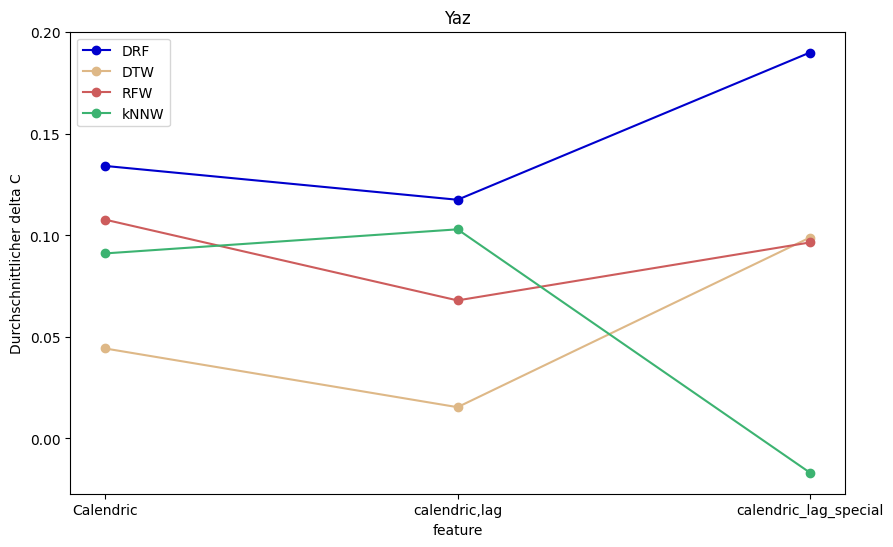

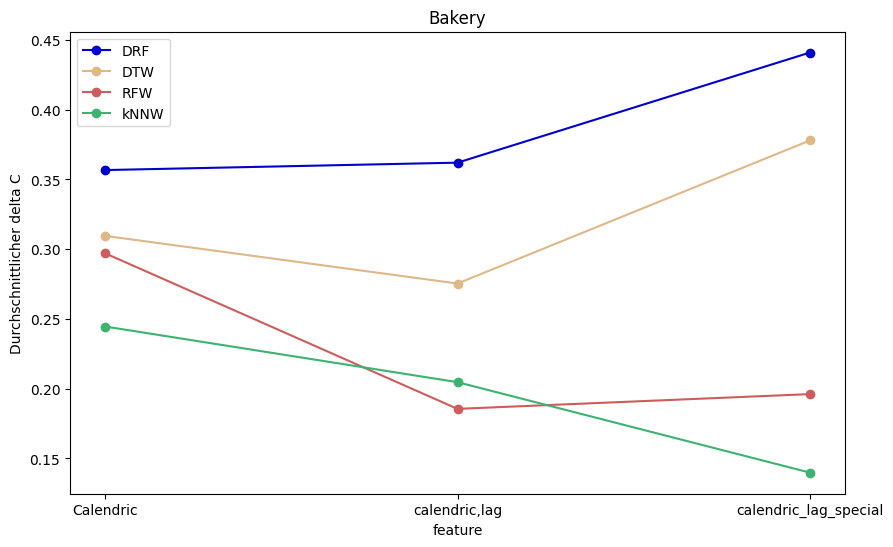

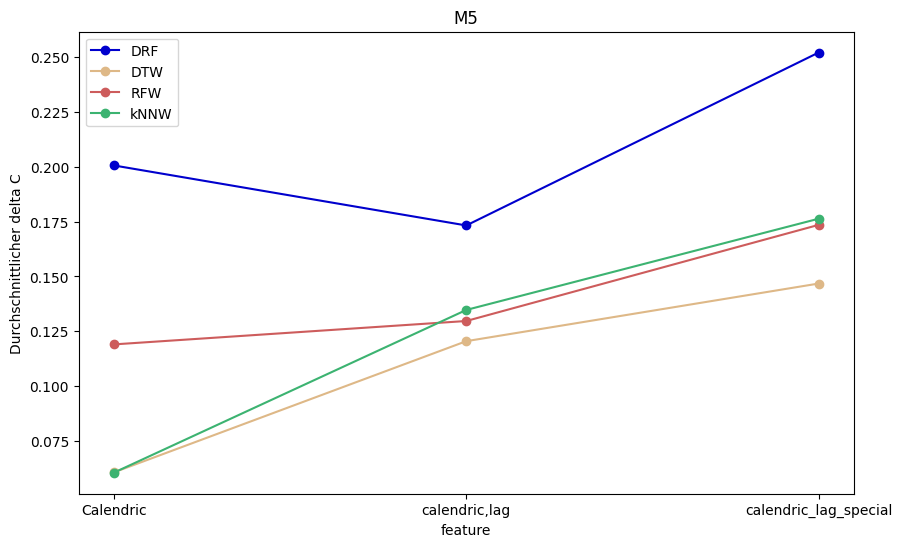

In [ ]:
for dataset, dataset_name in zip(datasets, dataset_names):
    # Gruppiere das DataFrame nach "Model" und "feature" und berechne den Durchschnitt für "delta C"
    aggregated_data = dataset.groupby(['Model', 'features'])['delta C'].mean().reset_index()

    # Erstelle ein Liniendiagramm mit separaten Linien für jedes Modell und verschiedenen Farben
    plt.figure(figsize=(10, 6))  # Optional: Legt die Größe des Diagramms fest

    for model, group_data in aggregated_data.groupby('Model'):
        color = model_color_mapping.get(model, 'b')  # 'b' ist die Standardfarbe
        plt.plot(group_data['features'], group_data['delta C'], marker='o', linestyle='-', label=model, color=color)

    # Achsenbeschriftungen und Legende hinzufügen
    plt.xlabel('feature')
    plt.ylabel('Durchschnittlicher delta C')
    plt.title(f'{dataset_name}')
    plt.legend()

    # Diagramm anzeigen
    plt.show()